In [33]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm
import argparse

sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')
sys.path.append('/local_code/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [34]:
def obj_delay(delay):
    # import the DVS data
    dvs_file_path = "/home/schiavazza/data/hpe/vicon_dataset/drum_s1/atis-d/"
    dvs_helper = DvsHelper(dvs_file_path)
    # read the labeled 2d points
    dvs_helper.read_points_labels("/home/schiavazza/data/hpe/vicon_dataset/drum_s1/atis-d/labeled_points.yml");
    # extract the time of the labeled points
    print(dvs_helper.labeled_points)
    labels_times = np.array(dvs_helper.labeled_points['times'])

    print(labels_times)
    # labels_times = [0.0]
    labels = list(dvs_helper.labeled_points['points'][0].keys())
    print(labels)


    # load c3d vicon data
    c3d_file_path = "/home/schiavazza/data/hpe/vicon_dataset/drum_f1/drum_f1.c3d"
    c3d_helper = C3dHelper(c3d_file_path, delay=delay, camera_markers=True)
    print(c3d_helper.reader.point_labels)
    c3d_helper.reader.frame_count

    vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
    print(c3d_helper.frame_times)
    vicon_points = c3d_helper.get_vicon_points_interpolated(vicon_labeled_frames, labels, labels_times)
    vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
    # vicon_points_mark = vicon_points
    c3d_helper.markers_T
    print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
    print(f"times from vicon labels: {vicon_points_mark['times']}")
    dvs_helper.labeled_points['times']
    vicon_points_mark['times']
    proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
    proj_helper.import_camera_calbration("/home/schiavazza/data/hpe/vicon_dataset/drum_f1/atis-s/calib-s.txt");
    proj_helper.image_points

    # find transform
    T, result = proj_helper._find_R_t_opencv()
    print(result)

    return result

In [35]:
delays = np.linspace(0.21, 0.4, 50)
res = []
for d in delays:
    r = obj_delay(d)
    if r > 100: r = 100
    res.append(r)
res = np.array(res)

no manual zero time found, using zero instead
{'points': [{'P11:LELB': {'x': 891, 'y': 269}, 'P11:LFHD': {'x': 824, 'y': 78}, 'P11:RELB': {'x': 712, 'y': 264}, 'P11:RFHD': {'x': 794, 'y': 76}, 'P11:STRN': {'x': 808, 'y': 228}}, {'P11:LELB': {'x': 875, 'y': 309}, 'P11:LFHD': {'x': 816, 'y': 118}, 'P11:RELB': {'x': 704, 'y': 306}, 'P11:RFHD': {'x': 787, 'y': 113}, 'P11:STRN': {'x': 799, 'y': 272}}, {'P11:LELB': {'x': 878, 'y': 284}, 'P11:LFHD': {'x': 830, 'y': 90}, 'P11:RELB': {'x': 707, 'y': 275}, 'P11:RFHD': {'x': 795, 'y': 90}, 'P11:STRN': {'x': 810, 'y': 233}}, {'P11:LELB': {'x': 874, 'y': 296}, 'P11:LFHD': {'x': 819, 'y': 90}, 'P11:RELB': {'x': 685, 'y': 259}, 'P11:RFHD': {'x': 783, 'y': 87}, 'P11:STRN': {'x': 797, 'y': 250}}, {'P11:LELB': {'x': 850, 'y': 272}, 'P11:LFHD': {'x': 850, 'y': 107}, 'P11:RELB': {'x': 709, 'y': 284}, 'P11:RFHD': {'x': 831, 'y': 107}, 'P11:STRN': {'x': 805, 'y': 247}}, {'P11:LELB': {'x': 875, 'y': 284}, 'P11:LFHD': {'x': 833, 'y': 91}, 'P11:RELB': {'x': 70

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [2.0, 4.4, 6.8, 9.2, 11.6, 14.0]
times from vicon labels: [ 2.   4.4  6.8  9.2 11.6 14. ]
Number of 3d points: 30
Number of image points: 30
64.0760971116531
no manual zero time found, using zero instead
{'points': [{'P11:LELB': {'x': 891, 'y': 269}, 'P11:LFHD': {'x': 824, 'y': 78}, 'P11:RELB': {'x': 712, 'y': 264}, 'P11:RFHD': {'x': 794, 'y': 76}, 'P11:STRN': {'x': 808, 'y': 228}}, {'P11:LELB': {'x': 875, 'y': 309}, 'P11:LFHD': {'x': 816, 'y': 118}, 'P11:RELB': {'x': 704, 'y': 306}, 'P11:RFHD': {'x': 787, 'y': 113}, 'P11:STRN': {'x': 799, 'y': 272}}, {'P11:LELB': {'x': 878, 'y': 284}, 'P11:LFHD': {'x': 830, 'y': 90}, 'P11:RELB': {'x': 707, 'y': 275}, 'P11:RFHD': {'x': 795, 'y': 90}, 'P11:STRN': {'x': 810, 'y': 233}}, {'P11:LELB': {'x': 874, 'y': 296}, 'P11:LFHD': {'x': 819, 'y': 90}, 'P11:RELB': {'x': 685, 'y': 259}, 'P11:RFHD': {'x': 783, 'y': 87}, 'P11:STRN': {'x': 797, 'y': 250}}, {'P11:LELB': {'x': 850, 'y': 272}, 'P11:LFHD': {'x': 850, 'y': 107}, 'P11:RELB'

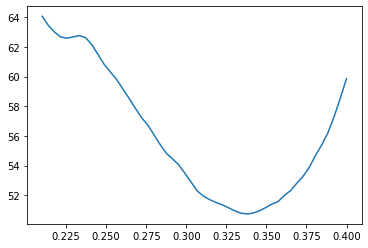

In [36]:
plt.plot(delays, res)

In [37]:
delays[res.argmin()]

0.3379591836734694

In [38]:
np.abs((delays - 0.214)).argmin()

1

In [39]:
res.min()

50.73522712385071

In [40]:
res.argmin()

33